In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [103]:
data = []

with open("Results\\ID Paper Test noise Setting 5of6\\summary.pickle", "rb") as f:
    data = pickle.load(f)

In [104]:
for k in data.keys():
    print(f'{k}\t{np.shape(data[k])}')

median y_pred_rr overfit	()
std y_pred_rr overfit	()
iqr y_pred_rr overfit	(2,)
median mse_rr overfit	()
std mse_rr overfit	()
iqr mse_rr overfit	(2,)
median r2_rr overfit	()
std r2_rr overfit	()
iqr r2_rr overfit	(2,)
median y_pred_rls overfit	()
std y_pred_rls overfit	()
iqr y_pred_rls overfit	(2,)
median mse_rls overfit	()
std mse_rls overfit	()
iqr mse_rls overfit	(2,)
median r2_rls overfit	()
std r2_rls overfit	()
iqr r2_rls overfit	(2,)
median y_pred_rr non_overfit	()
std y_pred_rr non_overfit	()
iqr y_pred_rr non_overfit	(2,)
median mse_rr non_overfit	()
std mse_rr non_overfit	()
iqr mse_rr non_overfit	(2,)
median r2_rr non_overfit	()
std r2_rr non_overfit	()
iqr r2_rr non_overfit	(2,)
median y_pred_rls non_overfit	()
std y_pred_rls non_overfit	()
iqr y_pred_rls non_overfit	(2,)
median mse_rls non_overfit	()
std mse_rls non_overfit	()
iqr mse_rls non_overfit	(2,)
median r2_rls non_overfit	()
std r2_rls non_overfit	()
iqr r2_rls non_overfit	(2,)
median volume	()
std volume	()
iqr

# MSE compare

In [105]:
mse_rr_o = data['median mse_rr overfit']
mse_rls_o = data['median mse_rls overfit']
mse_rr_n = data['median mse_rr non_overfit']
mse_rls_n = data['median mse_rls non_overfit']

iqr_rr_o = data['iqr mse_rr overfit']
iqr_rls_o = data['iqr mse_rls overfit']
iqr_rr_n = data['iqr mse_rr non_overfit']
iqr_rls_n = data['iqr mse_rls non_overfit']

In [106]:
print(y), error, iqr_rr_o

[0.00039224 0.00859346 0.01552811 0.01799479]


(None,
 array([[0.00039224, 0.00859346, 0.01552811, 0.01799479],
        [0.00039224, 0.00859346, 0.01552811, 0.01799479]]),
 array([0.00034991, 0.00034991]))

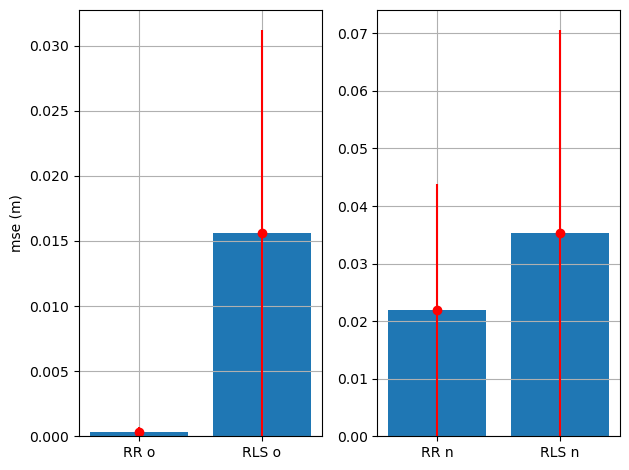

In [107]:
x = np.array(['RR o', 'RLS o', 'RR n', 'RLS n'])
y = np.array([mse_rr_o, mse_rls_o, mse_rr_n, mse_rls_n])
error = np.array([
    [iqr_rr_o[0], iqr_rls_o[0], iqr_rr_n[0], iqr_rls_n[0]],  # Lower errors
    [iqr_rr_o[1], iqr_rls_o[1], iqr_rr_n[1], iqr_rls_n[1]]   # Upper errors
])

plt.subplot(1,2,1)
plt.bar(x[:2], y[:2])
plt.errorbar(x[:2], y[:2], error[:,:2], fmt='o', color = 'r')
plt.grid()
plt.ylabel('mse (m)')
plt.subplot(1,2,2)
plt.bar(x[2:], y[2:])
plt.errorbar(x[2:], y[2:], error[:,2:], fmt='o', color = 'r')
plt.grid()
plt.tight_layout()
plt.show()

# Trajectory

In [108]:
data_trial = []

with open("Results\\ID Paper Test noise Setting 5of6\\data_trial0.pickle", "rb") as f:
    data_trial = pickle.load(f)
for k in data_trial.keys():
    print(f'{k}\t{np.shape(data_trial[k])}')

sim time	()
dt ms	()
gains	(4,)
modular projections	(3, 3)
module operators	(3, 2, 3)
activity	(18751, 3, 4, 90)
velocity	(18751, 3)
position	(18751, 3)
position internal	(18751, 3)
volume visited	()
y_pred_rr overfit	(18751, 3)
mse_rr overfit	()
r2_rr overfit	()
y_pred_rls overfit	(18751, 3)
mse_rls overfit	()
r2_rls overfit	()
y_pred_rr non_overfit	(18751, 3)
mse_rr non_overfit	()
r2_rr non_overfit	()
y_pred_rls non_overfit	(18751, 3)
mse_rls non_overfit	()
r2_rls non_overfit	()


In [109]:
pos = np.array(data_trial['position'])
pos_rr = np.array(data_trial['y_pred_rr overfit'])
pos_rls = np.array(data_trial['y_pred_rls overfit'])
t = np.linspace(0, data_trial['sim time'], len(pos))

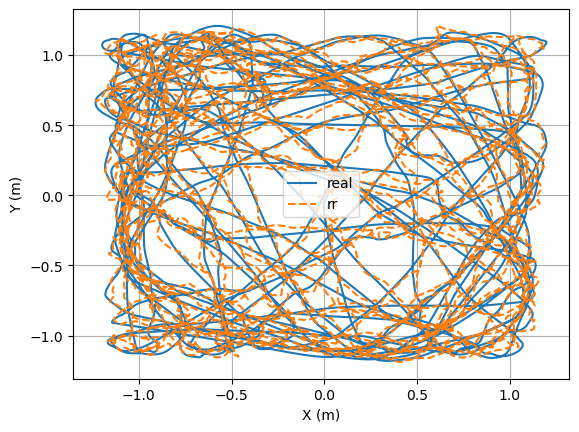

In [112]:
start = 0
stop = -1

plt.plot(pos[start:stop,0], pos[start:stop,1], label='real')
plt.plot(pos_rr[start:stop,0], pos_rr[start:stop,1], ls="dashed", label='rr')
#plt.plot(pos_rls[start:stop,0], pos_rls[start:stop,1], ls="dashed", label='rls')

plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid()
plt.legend()
plt.show()

# Activity

In [113]:
act = np.array(data_trial['activity'])
opt = np.array(data_trial['module operators'])
prj = np.array(data_trial['modular projections'])
gns = np.array(data_trial['gains'])

Projection in ['X' 'Y']
Projection in ['Y' 'Z']
Projection in ['X' 'Z']


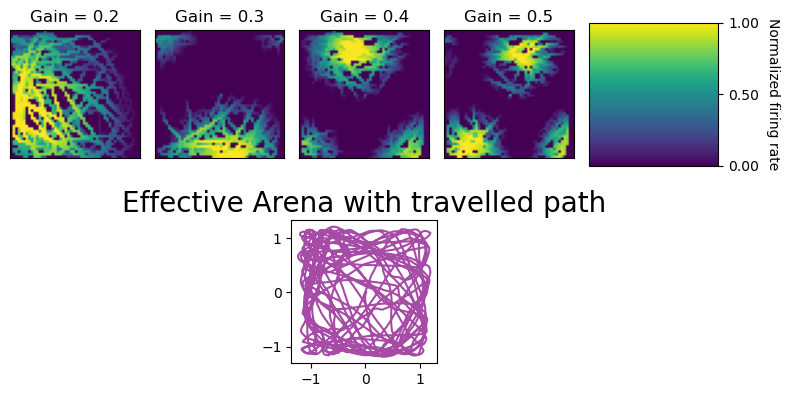

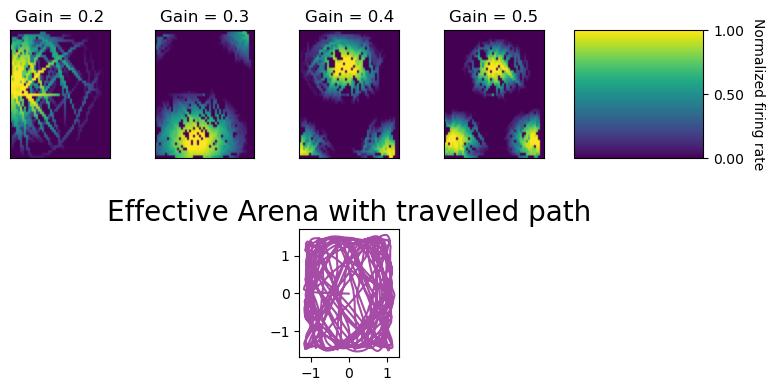

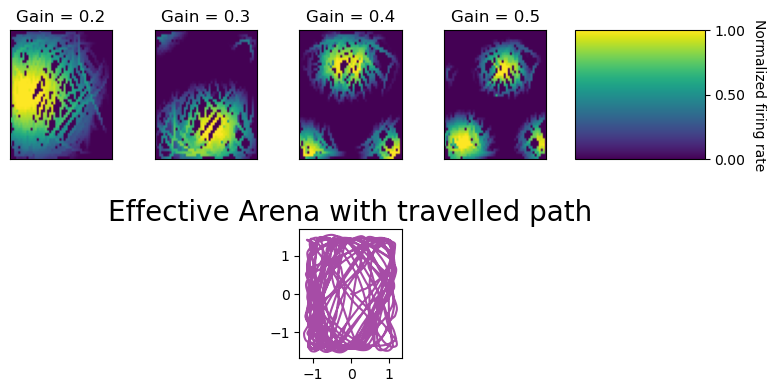

In [114]:
plot_modular_activity(opt, pos, act, gns, 'Paper Test Setting 0of1', prj)

In [69]:
def plot_frame_figure(gains, positions_array, network_activity, num_bins=50, neuron=42, ID=0, subID=None):
    """
    Plots a heatmap of network activity at different gain levels and overlays the trajectory. 
    The plot is saved in the results folder within the relative directory.

    :param positions_array: list of shape (ntime, ndim) 
    :param num_bins: int 
    :param network_activity: list of shape (ntime, ngain, nneuron)
    :param neuron: int. Default=42
    """
    x_min, y_min = np.min(positions_array, axis=0)
    x_max, y_max = np.max(positions_array, axis=0)

    fig = plt.figure(figsize=(8, 4))
    gs = fig.add_gridspec(2, len(gains)+1) 

    # Adding subplots to the gridspec
    for a, alpha in enumerate(gains):

        heatmap_ax = fig.add_subplot(gs[0, a])
        heatmap_ax.set_aspect('equal')

        # Initialize an empty heatmap
        x_bins = np.linspace(x_min, x_max,num_bins)
        y_bins = np.linspace(y_min, y_max,num_bins)
        heatmap = np.zeros((num_bins, num_bins))

        # Iterate over positions and network_activity (Over time)
        for position, activity in zip(positions_array, network_activity):
            x_index = np.digitize(position[0], x_bins) - 1
            y_index = np.digitize(position[1], y_bins) - 1
            heatmap[x_index, y_index] = max(heatmap[x_index, y_index], np.mean(activity[a, neuron]))
            #                                 Activity is of shape (ngains, neurons) here  ^^ pick any neuron

        im = heatmap_ax.imshow(heatmap.T, origin='lower', extent=[x_min, x_max, y_min, y_max], vmax=1, vmin=0)
        heatmap_ax.set(title=f'Gain = {round(alpha, 2)}', xticks=[], yticks=[])

    # # add subplot for colorbar (there is sth odd here, max fr is a bit above 1 and not 1)
    cbar_ax = fig.add_subplot(gs[0, -1])  # Spanning the last column
    colorbar = fig.colorbar(im, cax=cbar_ax)
    colorbar.set_label('Normalized firing rate', labelpad=15, rotation=270)
    colorbar.set_ticks([0, 0.5, 1])  # Set ticks at min, mid, and max values
    colorbar.set_ticklabels([f'{0:.2f}', f'{0.5:.2f}', f'{1:.2f}'])  # Set tick labels

    positions_array = np.array(positions_array) # enable numpy slicing      
    trajectory_ax = fig.add_subplot(gs[1, 1:len(gains)])  # Adding subplot for the bottom row
    trajectory_ax.plot(positions_array[:, 0], positions_array[:, 1], alpha=0.7, color='purple')
    trajectory_ax.set_title('Effective Arena with travelled path', fontsize=20)
    trajectory_ax.set_aspect('equal')


    fig.tight_layout(h_pad=3.0) # Adjust layout # change spacing between plots
    if subID is None:
        path = f'Results\\ID {ID}\\result_activity_figure.png'
    else:
        path = f'Results\\ID {ID}\\activity_{subID}.png'
    plt.savefig(path, format='png') # save in relative folder Results in Source/Repos/SelfLocalisationCF
    #plt.show()
    #plt.close()

def plot_modular_activity(prj_op, pos, ac, gains, ID, projection):
    pos2d = np.einsum('mnx, tx->mtn', prj_op, pos)
    abc = np.array(['X', 'Y', 'Z'])
    for i, p in enumerate(pos2d):
        print(f'Projection in {abc[projection[i]]}')
        plot_frame_figure(gains, p, ac[:,i], ID=ID, subID=f'mod{i}', neuron=24)

In [84]:
a = [1, 2, 3]
b = [a]*4

In [85]:
for i in range(4):
    print(b[i])

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


In [86]:
b

[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]

In [88]:
c = [a]

In [91]:
c[1]

IndexError: list index out of range